In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import requests

#Task1
#### Using sendy_logistics.csv dataset create a new column and call it Temp_Diff that calculates the difference of Tempreture Column and current temperture.



'<!doctype html><html dir="rtl" lang="ar-EG"><head>\n      <meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1, viewport-fit=cover"/><meta data-react-helmet="true" name="robots" content="max-image-preview:large"/><meta data-react-helmet="true" name="robots" content="index, follow"/><meta data-react-helmet="true" name="referrer" content="origin"/><meta data-react-helmet="true" name="description" content="التنبؤات الجوية ليوم وليلة Cairo والظروف الجوية والرادار المزدوج من القناة الجوية وموقع weather.com"/><meta data-react-helmet="true" name="msapplication-TileColor" content="#ffffff"/><meta data-react-helmet="true" name="msapplication-TileImage" content="/daybreak-today/assets/ms-icon-144x144.d353af.png"/><meta data-react-helmet="true" name="theme-color" content="#ffffff"/><meta data-react-helmet="true" property="og:title" content="التنبؤات والظروف الجوية Cairo - القناة الجوية | موقع Weather.com"/><me
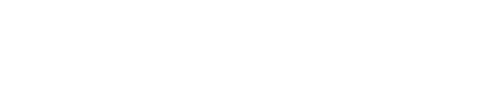
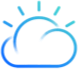

In [ ]:
url=('https://weather.com/ar-EG/weather/today/l/EGXX0004:1:EG?Goto=Redirected')
responce=requests.get(url)
responce.text

<!DOCTYPE doctype html>
<html dir="rtl" lang="ar-EG"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="التنبؤات الجوية ليوم وليلة Cairo والظروف الجوية والرادار المزدوج من القناة الجوية وموقع weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daybreak-today/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="التنبؤات والظروف الجوية Cairo - القناة الجوية | موقع Weather.com" data-react-helmet="true" property="og:title"/><m
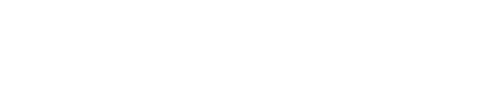
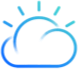

In [ ]:
soup=BeautifulSoup(responce.text,'html.parser')
soup

In [ ]:
soup.find_all('span')

[<span class="LanguageSelector--LanguageSelectorStatus--mXkYQ" data-testid="languageSelectorStatus">EG</span>,
 <span class="LanguageSelector--unitDisplay--23xY5">°C</span>,
 <span class="UnitSelector--UnitSelectorButtonTextF--2KVHq">°ف</span>,
 <span class="UnitSelector--divider--18ehy">|</span>,
 <span class="UnitSelector--UnitSelectorButtonTextC--3bate">°م</span>,
 <span class="styles--liContent--3i8m_">اليوم</span>,
 <span class="styles--liContent--3i8m_">كل ساعة</span>,
 <span class="styles--liContent--3i8m_">10 أيام</span>,
 <span class="styles--liContent--3i8m_">نهاية الأسبوع</span>,
 <span class="styles--liContent--3i8m_">شهريًا</span>,
 <span class="styles--liContent--3i8m_">رادار</span>,
 <span class="styles--fullText--V-nzm">مزيد من التنبؤات</span>,
 <span class="styles--shortText--2pzBL">المزيد</span>,
 <span class="styles--item--a-T_N">متتبع الحساسية</span>,
 <span class="styles--item--a-T_N">التنبؤ بجودة الهواء</span>,
 <span class="CurrentConditions--tempValue--3a50n" da

In [ ]:
current_temp=int(soup.find_all('span',attrs={'data-testid':'TemperatureValue'})[0].get_text()[:2])
current_temp

23

In [ ]:
df=pd.read_csv('/content/sendy_logistics.csv')
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [ ]:
df['Temp_Diff']=df['Temperature']-current_temp
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_Diff
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-2.6
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,3.4
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,-3.8
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,5.6
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,3.0
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,6.2
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,-8.0


##Using sendy_logistics.csv dataset create a new column and call it Fehr_Temp that calculates the fahrenheit tempreture from celsius Tempreture Column.

In [ ]:
## from C to F :	Divide by 5, then multiply by 9, then add 32
df['Fehr_Temp']=((df['Temperature']/5)*9)+32
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_Diff,Fehr_Temp
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-2.6,68.72
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,3.4,79.52
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN,NaN
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,-3.8,66.56
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,-7.6,59.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,5.6,83.48
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,3.0,78.80
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,6.2,84.56
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,-8.0,59.00


# Task2
##Using ufo.csv dataset, extract Month from 'Time'; and use it to create new column and call it 'IN_December', then it will have a value of '1'; if the month is December and '0' otherwise.

In [ ]:
df=pd.read_csv('/content/ufo.csv')
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18201,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211,18212,18213,18214,18215,18216,18217,18218,18219,18220,18221,18222,18223,18224,18225,18226,18227,18228,18229,18230,18231,18232,18233,18234,18235,18236,18237,18238,18239,18240
City,Ithaca,Willingboro,Holyoke,Abilene,New York Worlds Fair,Valley City,Crater Lake,Alma,Eklutna,Hubbard,Fontana,Waterloo,Belton,Keokuk,Ludington,Forest Home,Los Angeles,Hapeville,Oneida,Bering Sea,Nebraska,NaN,NaN,Owensboro,Wilderness,San Diego,Wilderness,Clovis,Los Alamos,Ft. Duschene,South Kingstown,North Tampa,Ft. Lee,Salinas AFB,Jasper,Winston-Salem,Portsmouth,Dallas,Huntington Beach,San Antonio,...,Santa Paula,Kea'au,Saco,Bremerton,Havre,Cerrilillo,Mansfield,Murphreesboro,Houston,Monument Valley,Holyoke,Carson,Pasadena,Austin,El Campo,Garden Grove,Berthoud Pass,Sisterdale,Garden Grove,Shasta Lake,Franklin,Albrightsville,Greenville,Eufaula,Simi Valley,San Francisco,San Francisco,Kingsville,Chicago,Pismo Beach,Pismo Beach,Lodi,Anchorage,Capitola,Fountain Hills,Grant Park,Spirit Lake,Eagle River,Eagle River,Ybor
Colors Reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RED,NaN,NaN,NaN,NaN,NaN,NaN,RED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLUE,NaN,NaN,GREEN,NaN,NaN,ORANGE,NaN,NaN,NaN,BLUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RED,NaN,NaN,NaN,NaN,NaN,RED,NaN
Shape Reported,TRIANGLE,OTHER,OVAL,DISK,LIGHT,DISK,CIRCLE,DISK,CIGAR,CYLINDER,LIGHT,FIREBALL,SPHERE,OVAL,DISK,CIRCLE,NaN,NaN,RECTANGLE,OTHER,DISK,NaN,LIGHT,RECTANGLE,DISK,CIGAR,DISK,DISK,DISK,DISK,SPHERE,CYLINDER,CIGAR,DISK,FIREBALL,DISK,FORMATION,SPHERE,DISK,OVAL,...,LIGHT,SPHERE,TRIANGLE,OTHER,DISK,NaN,FLASH,FLASH,LIGHT,OTHER,DIAMOND,DISK,FIREBALL,FORMATION,OTHER,LIGHT,TRIANGLE,DIAMOND,CHEVRON,DISK,DISK,OTHER,NaN,DISK,FORMATION,FORMATION,TRIANGLE,LIGHT,DISK,OVAL,OVAL,NaN,VARIOUS,TRIANGLE,NaN,TRIANGLE,DISK,NaN,LIGHT,OVAL
State,NY,NJ,CO,KS,NY,ND,CA,MI,AK,OR,CA,AL,SC,IA,MI,CA,CA,GA,TN,AK,NE,LA,LA,KY,WV,CA,WV,NM,NM,UT,RI,FL,VA,CA,FL,NC,VA,TX,CA,NM,...,CA,HI,ME,WA,MT,NM,TX,TN,TX,UT,MA,CA,CA,TX,TX,CA,CO,TX,CA,CA,NH,PA,SC,OK,CA,CA,CA,TX,IL,CA,CA,WI,AK,CA,AZ,IL,IA,WI,WI,FL
Time,6/1/1930 22:00,6/30/1930 20:00,2/15/1931 14:00,6/1/1931 13:00,4/18/1933 19:00,9/15/1934 15:30,6/15/1935 0:00,7/15/1936 0:00,10/15/1936 17:00,6/15/1937 0:00,8/15/1937 21:00,6/1/1939 20:00,6/30/1939 20:00,7/7/1939 2:00,6/1/1941 13:00,7/2/1941 11:30,2/25/1942 0:00,6/1/1942 22:30,7/15/1942 1:00,4/30/1943 23:00,6/1/1943 15:00,8/15/1943 0:00,8/15/1943 0:00,10/15/1943 11:00,1/1/1944 10:00,1/1/1944 12:00,1/1/1944 12:00,4/2/1944 11:00,6/1/1944 12:00,6/30/1944 10:00,7/1/1944 20:00,7/15/1944 13:00,1/1/1945 12:00,6/1/1945 12:00,6/1/1945 13:30,6/7/1945 7:00,7/10/1945 1:30,7/15/1945 14:00,8/8/1945 12:00,8/16/1945 11:30,...,12/27/2000 10:00,12/27/2000 15:00,12/27/2000 22:10,12/28/2000 3:00,12/28/2000 4:00,12/28/2000 11:00,12/28/2000 12:00,12/28/2000 12:15,12/28/2000 17:09,12/28/2000 17:51,12/28/2000 18:00,12/28/2000 18:20,12/28/2000 19:10,12/29/2000 0:00,12/29/2000 9:00,12/29/2000 16:10,12/29/2000 19:30,12/29/2000 20:00,12/29/2000 20:30,12/29/2000 20:30,12/29/2000 20:50,12/29/2000 21:00,12/29/2000 22:00,12/29/2000 23:30,12/30/2000 10:00,12/30/2000 22:00,12/30/2000 22:00,12/31/2000 4:00,12/31/2000 11:45,12/31/2000 20:00,12/31/2000 20:00,12/31/2000 20:30,12/31/2000 21:00,12/31/2000 22:00,12/31/2000 23:00,12/31/2000 23:00,12/31/2000 23:00,12/31/2000 23:45,12/31/2000 23:45,12/31/2000 23:59


In [ ]:
df['Time']=pd.to_datetime(df['Time'],format='%m/%d/%Y %H:%M')
df

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [ ]:
df['Time']=pd.to_datetime(df['Time'],format='%m/%d/%Y %H:%M')
df

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [ ]:
df['month']=df['Time'].dt.month
df

,City,Colors Reported,Shape Reported,State,Time,month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4
...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,12
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,12
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,12
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,12


In [ ]:
def In_December(x):
  if x==12:
    return '1'
  else: return '0'  
df['In_December']=df['month'].apply(In_December)
df

,City,Colors Reported,Shape Reported,State,Time,month,In_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,0
...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,12,1
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,12,1
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,12,1
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,12,1


##  Create new column and call it Time_Diff_From_WW1, that have time difference in years from the ;Time; Column and World War 1 start date that is 39;July 28, 1914.

In [ ]:
from datetime import datetime 
df['Time_Diff_From_WW1']=(datetime(1914,7,28)-df['Time'])/np.timedelta64(1,'Y')
df

,City,Colors Reported,Shape Reported,State,Time,month,In_December,Time_Diff_From_WW1
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,0,-15.846778
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,0,-15.925949
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,0,-16.554983
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,0,-16.845087
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,0,-18.726714
...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,12,1,-86.432872
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,12,1,-86.432872
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,12,1,-86.432958
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,12,1,-86.432958


#Task 3
## Using titanic_full.csv dataset, extract Mr,Miss,Mrs,etc.. from Name column and use it to create new column and call it Title then plot a countplot.

In [ ]:
df=pd.read_csv('/content/titanic_full.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['title']=df['Name'].apply(lambda x:x.split(',')[1].split()[0])
df['title'].unique()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


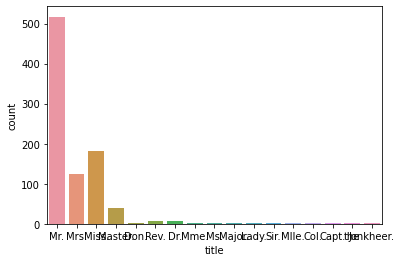

In [ ]:
sns.countplot(df['title'])

## Using sendy_logistics.csv extract user_id in a seperate column.

In [ ]:
df=pd.read_csv('/content/sendy_logistics.csv')
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,21161,21162,21163,21164,21165,21166,21167,21168,21169,21170,21171,21172,21173,21174,21175,21176,21177,21178,21179,21180,21181,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191,21192,21193,21194,21195,21196,21197,21198,21199,21200
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883,Order_No_7408,Order_No_22680,Order_No_21578,Order_No_5234,Order_No_1768,Order_No_823,Order_No_2533,Order_No_7842,Order_No_6452,Order_No_9463,Order_No_21335,Order_No_21307,Order_No_8201,Order_No_11630,Order_No_19866,Order_No_23338,Order_No_14810,Order_No_12412,Order_No_663,Order_No_4818,Order_No_8816,Order_No_17338,Order_No_12130,Order_No_21312,Order_No_13398,Order_No_13031,Order_No_17028,Order_No_15792,Order_No_4861,Order_No_1211,Order_No_5857,Order_No_9676,Order_No_27859,Order_No_20416,Order_No_21067,...,Order_No_7105,Order_No_16682,Order_No_13672,Order_No_18594,Order_No_11770,Order_No_20700,Order_No_24433,Order_No_2978,Order_No_20893,Order_No_18149,Order_No_6137,Order_No_1410,Order_No_12385,Order_No_26365,Order_No_17484,Order_No_24677,Order_No_6901,Order_No_297,Order_No_3444,Order_No_18952,Order_No_7229,Order_No_11816,Order_No_9070,Order_No_22213,Order_No_25722,Order_No_26544,Order_No_12532,Order_No_1396,Order_No_16829,Order_No_16563,Order_No_16262,Order_No_11670,Order_No_4988,Order_No_865,Order_No_9932,Order_No_8834,Order_No_22892,Order_No_2831,Order_No_6174,Order_No_9836
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737,User_Id_1342,User_Id_2803,User_Id_1075,User_Id_733,User_Id_2112,User_Id_2820,User_Id_704,User_Id_1990,User_Id_3295,User_Id_248,User_Id_3599,User_Id_198,User_Id_1500,User_Id_391,User_Id_3722,User_Id_1960,User_Id_3698,User_Id_1362,User_Id_1404,User_Id_2030,User_Id_346,User_Id_1582,User_Id_627,User_Id_3560,User_Id_2383,User_Id_1346,User_Id_3184,User_Id_909,User_Id_3291,User_Id_3222,User_Id_788,User_Id_393,User_Id_142,User_Id_1015,User_Id_1245,...,User_Id_111,User_Id_2053,User_Id_3036,User_Id_3599,User_Id_265,User_Id_1209,User_Id_3426,User_Id_570,User_Id_3291,User_Id_1922,User_Id_2195,User_Id_218,User_Id_1850,User_Id_2523,User_Id_928,User_Id_3326,User_Id_2956,User_Id_2335,User_Id_1500,User_Id_635,User_Id_3194,User_Id_590,User_Id_3521,User_Id_237,User_Id_59,User_Id_2145,User_Id_478,User_Id_868,User_Id_391,User_Id_3432,User_Id_1231,User_Id_1146,User_Id_875,User_Id_1245,User_Id_3582,User_Id_2001,User_Id_1796,User_Id_2956,User_Id_2524,User_Id_718
Vehicle Type,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,...,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1,3,3,3,3,3,3,1,3,3,3,3,3,3,3,1,3,3,1,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,1,3,...,3,1,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,1,3
Personal or Business,Business,Personal,Business,Business,Personal,Business,Business,Business,Business,Business,Personal,Business,Business,Business,Business,Business,Business,Business,Business,Personal,Personal,Business,Personal,Personal,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Personal,Business,...,Business,Personal,Personal,Business,Business,Business,Business,Business,Business,Personal,Business,Personal,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Business,Personal,Business,Business,Business,Business,Business,Business,Personal,Business,Business,Personal,Business,Business,Personal,Business
Placement - Day of Month,9,12,30,15,13,14,9,11,30,23,15,2,23,25,23,2,19,15,14,28,12,22,10,11,11,3,5,19,14,28

In [ ]:
type(df['User Id'][0])

str

In [ ]:
df['User Id'][0].split('_')[2]

'633'

In [ ]:
df['Id_number']=df['User Id'].apply(lambda x:x.split('_')[2])
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Id_number
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,633
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2285
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,265
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,1402
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,2001
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1796
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,2956
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,2524


#Task4
##Using visitor-interests.csv dataset, from the first 50 row extract Browser, OS, Device data from UserAgent column and use it to create new columns for Browser, OS, Device.

In [ ]:
df=pd.read_csv('/content/visitor-interests.csv')
df

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company
...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine


In [ ]:
pip install user_agents

In [ ]:
import user_agents

In [ ]:
ua=user_agents.parse(df['UserAgent'][0])
print(ua.os.family)

Windows


In [ ]:
df=df.sample(50)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 18631 to 4924
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         50 non-null     object
 1   UserAgent  50 non-null     object
 2   Country    40 non-null     object
 3   Languages  50 non-null     object
 4   Interests  50 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [ ]:
df[['Browser','OS','Device']]=df['UserAgent'].apply(lambda x: pd.Series((user_agents.parse(x).browser.family,user_agents.parse(x).os.family,user_agents.parse(x).device.family)))
df

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device
18631,203.166.38.225,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,AU,english,company,IE,Windows,Other
1467,27.107.166.216,Mozilla/5.0 (Linux; Android 5.0; Micromax A106...,IN,english,educational institution,Chrome Mobile WebView,Android,Micromax A106
10316,104.198.6.37,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,NaN,english,other,Chrome,Windows,Other
10709,106.51.244.62,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/534.2...,IN,english,online cinema/movies online/cinema,Chrome,Windows,Other
11198,107.190.163.86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,NaN,english,internet directory/search engine,Chrome,Windows,Other
14149,151.237.180.221,Mozilla/5.0 (Windows NT 6.1; rv:32.0) Gecko/20...,NaN,english,social network/forum,Firefox,Windows,Other
9734,101.176.201.219,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,AU,english,shop/online shopping website,Chrome,Mac OS X,Mac
3329,50.109.249.68,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,US,english,company,Chrome,Windows,Other
14039,148.251.54.44,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,DE,english,educational institution,Chrome,Windows,Other
18966,209.142.150.238,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,US,english,company,Chrome,Windows,Other


##Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from IP column.

In [ ]:
pip install ip2geotools


     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 98 kB 7.9 MB/s 
     |████████████████████████████████| 843 kB 35.1 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 250 kB 50.7 MB/s 
     |████████████████████████████████| 42 kB 870 kB/s 
     |████████████████████████████████| 414 kB 52.7 MB/s 
     |████████████████████████████████| 330 kB 58.6 MB/s 
     |████████████████████████████████| 829 kB 49.5 MB/s 
     |████████████████████████████████| 103 kB 65.3 MB/s 
     |████████████████████████████████| 958 kB 62.4 MB/s 
     |████████████████████████████████| 1.1 MB 27.0 MB/s 
     |████████████████████████████████| 62 kB 855 kB/s 
     |████████████████████████████████| 138 kB 49.7 MB/s 
     |████████████████████████████████| 192 kB 55.4 MB/s 
     |██████████████████████

In [ ]:
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

In [ ]:
df[['latitude']]=df['IP'].apply(lambda x: ip2geo.get(x,api_key='free').latitude)
df

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device,latitude
18631,203.166.38.225,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,AU,english,company,IE,Windows,Other,-28.815000
1467,27.107.166.216,Mozilla/5.0 (Linux; Android 5.0; Micromax A106...,IN,english,educational institution,Chrome Mobile WebView,Android,Micromax A106,NaN
10316,104.198.6.37,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,NaN,english,other,Chrome,Windows,Other,45.601506
10709,106.51.244.62,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/534.2...,IN,english,online cinema/movies online/cinema,Chrome,Windows,Other,12.987810
11198,107.190.163.86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,NaN,english,internet directory/search engine,Chrome,Windows,Other,35.227209
14149,151.237.180.221,Mozilla/5.0 (Windows NT 6.1; rv:32.0) Gecko/20...,NaN,english,social network/forum,Firefox,Windows,Other,59.325117
9734,101.176.201.219,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,AU,english,shop/online shopping website,Chrome,Mac OS X,Mac,-33.854816
3329,50.109.249.68,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,US,english,company,Chrome,Windows,Other,47.675789
14039,148.251.54.44,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,DE,english,educational institution,Chrome,Windows,Other,50.535392
18966,209.142.150.238,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,US,english,company,Chrome,Windows,Other,41.875562


In [ ]:
df[['longitude']]=df['IP'].apply(lambda x: ip2geo.get(x,api_key='free').longitude)
df

#Task5
##Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from IP column and use it to create new Dist_From_Egypt column calculating distance with Egypt Lat/Lonng, you can get this location from google.



In [ ]:
from geopy.distance import great_circle

In [ ]:
#Latitude and longitude coordinates for Cairo-Egypt are: 30.033333, 31.233334.

In [ ]:
Cairo= (30, 31)
f['distance']=great_circle(Cairo,tuple(df['latitude','longitude']).kilometers,axis=1)
df


KeyError: ignored